In [4]:
# Patrick A. Pangilinan
# BSCS - C4A

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Loading the data set
data_path = "GT2.csv"
gamerdf = pd.read_csv(data_path)
gamerdf.head()

,ITEM NO.,CPU,RAM,Type of Storage,Storage Capacity,GPU,Target Usage
0,2021-9301,Ryzen 5,4GB,SSD,500GB,NO,Office
1,2021-9302,Ryzen 5,16GB,SSD,500GB,6GB,GAMING
2,2021-9303,Ryzen 3,4GB,HDD,1TB,NO,Office
3,2021-9304,Ryzen 5,16GB,SSD,1TB,4GB,GAMING
4,2021-9305,Pentium,16GB,HDD,500GB,6GB,Office


In [7]:
# Drop null values to clean up dataset
gamerdf = gamerdf.dropna()

In [8]:
# Get the count of each item after null value deletion
gamerdf.count()

ITEM NO.            46
CPU                 46
RAM                 46
Type of Storage     46
Storage Capacity    46
GPU                 46
Target Usage        46
dtype: int64

In [9]:
# The dataframe has 46 rows and 7 columns
gamerdf.shape

(46, 7)

In [10]:
# The top CPU overall used is "Pentium" and it appears in the dataframe 10 times.
# The most used ram size is "4GB" and it is used by 17 users in the dataframe.
# The storage type most used is "SSD" and it is used by 29 users.
# The top capacity size is "500GB" and it is used by 23 users.
# The majority dont have a GPU in the dataframe having 17 users that don't use a GPU.
# Lastly, there are more office users than gaming users with a total of 24 office users.
gamerdf.describe()

,ITEM NO.,CPU,RAM,Type of Storage,Storage Capacity,GPU,Target Usage
count,46,46,46,46,46,46,46
unique,46,7,3,2,2,5,2
top,2021-9301,Pentium,4GB,SSD,500GB,NO,Office
freq,1,10,17,29,23,17,24


In [11]:
#1. What CPU is mostly used in Gaming? 
# From the results of this table, the most frequently used CPU by the gamer legion is the almighty i9 with 7 gamers using it.
# Followed by the Ryzen 5 and Ryzen 7. This shows that most gamers won't settle for less than an i9 processor if they want some serious gaming performance.

# Filter the dataset for rows where Target Usage is 'GAMING'
gaming_data = gamerdf[gamerdf['Target Usage'] == 'GAMING']

# Use the value_counts() method to determine the frequency of each CPU in the gaming data
cpu_counts = gaming_data['CPU'].value_counts()

# Get the top 3 most used CPUs
top_3_cpus = cpu_counts.head(3)

# Create a table to show the top 3 most used CPUs and their frequency
table = top_3_cpus.to_frame()
table.reset_index(inplace=True)
table.columns = ['CPU', 'Frequency']
print(table)

       CPU  Frequency
0       i9          7
1  Ryzen 5          4
2  Ryzen 7          4


In [12]:
#2. How much gigabyte of RAM is usually used by gamers?
# The results of this table shows that the most popular RAM size is 16GB with 14 gamers using it followed by 8GB.
# It can also be noted that gamers won't settle for less than 8GB of RAM seeing as anything less would be limiting your gaming experience.

# Use the value_counts() method to determine the frequency of each RAM size in the gaming data
ram_counts = gaming_data['RAM'].value_counts()

# Get the top most used RAM sizes
top_ram = ram_counts.head(3)

# Create a table to show the top most used RAM sizes and their frequency
table = top_ram.to_frame()
table.reset_index(inplace=True)
table.columns = ['RAM (GB)', 'Frequency']
print(table)

  RAM (GB)  Frequency
0     16GB         14
1      8GB          8


In [13]:
#3. What CPU is mostly used in Office works?
# Most office users use pentium with 10 users using it followed by the Ryzen 5 and Ryzen 3.
# This goes to show that for most office work, a pentium suffices as they don't need that much processing power for most of the office duties.

# Filter the dataset for rows where Target Usage is 'OFFICE'
office_data = gamerdf[gamerdf['Target Usage'] == 'Office']

# Use the value_counts() method to determine the frequency of each CPU in the office data
cpu_counts_office = office_data['CPU'].value_counts()

# Get the top 3 most used CPUs
top_3_cpus_office = cpu_counts_office.head(3)

# Create a table to show the top 3 most used CPUs and their frequency
table = top_3_cpus_office.to_frame()
table.reset_index(inplace=True)
table.columns = ['CPU', 'Frequency']
print(table)

       CPU  Frequency
0  Pentium         10
1  Ryzen 5          4
2  Ryzen 3          2


In [14]:
#4. What is the predominant storage type used by gamers?
# Lastly, a whopping majority of gamers choose to use SSDs with 20 gamers using it instead of an HDD.
# This means that even though SSDs are more expensive per GB, most gamers still choose to use SSDs for the speed that it provides in reading data which is important for decreasing load times in games.

# Filter the dataset for rows where Target Usage is 'GAMING'
gaming_data = gamerdf[gamerdf['Target Usage'] == 'GAMING']

# Use the value_counts() method to determine the frequency of each storage type in the gaming data
storage_counts = gaming_data['Type of Storage'].value_counts()

# Get the top storage types
top_storage = storage_counts.head(3)

# Create a table to show the top storage types and their frequency
table = top_storage.to_frame()
table.reset_index(inplace=True)
table.columns = ['Storage Type', 'Frequency']
print(table)

  Storage Type  Frequency
0          SSD         20
1          HDD          2


In [15]:
# CLEANING DATA FOR TRAINING
# Drop the item number column as it is irrelevant for training
gamerdf = gamerdf.drop('ITEM NO.', axis=1)

# ONE-HOT ENCODE THE CATEGORICAL VARIABLES
# Get the column names of dataframe
columns = gamerdf.columns.tolist()
# Remove the column to not one-hot encode
columns.remove('Target Usage')
# One-hot encode all columns except 'Target Usage'
gamerdf = pd.get_dummies(gamerdf, columns=columns)

# Replace "Office" with 1 and "GAMING" with 0
gamerdf["Target Usage"] = gamerdf["Target Usage"].replace("Office", 1).replace("GAMING", 0)
gamerdf.head()

,Target Usage,CPU_Pentium,CPU_Ryzen 3,CPU_Ryzen 5,CPU_Ryzen 7,CPU_i5,CPU_i7,CPU_i9,RAM_16GB,RAM_4GB,RAM_8GB,Type of Storage_HDD,Type of Storage_SSD,Storage Capacity_1TB,Storage Capacity_500GB,GPU _4GB,GPU _4GB,GPU _6GB,GPU _6GB,GPU _NO
0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1
1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0
4,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
x = gamerdf.drop(['Target Usage'], axis=1)
y = gamerdf['Target Usage']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [17]:
# Create the model
model = Sequential()
# Create a dense layer with 16 units using relu activation
model.add(Dense(16, input_dim=x_train.shape[1], activation='relu'))
# Create a dropout layer with a dropout rate of 0.5 to prevent overfitting
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
# Use a sigmoid function for the classification of two classes, Office (1) and Gaming (0)
model.add(Dense(1, activation='sigmoid'))

# Compile and train the model with binary cross entropy for loss function
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
1/1 [==============================] - 1s 989ms/step - loss: 0.9952 - accuracy: 0.5625 - val_loss: 0.7505 - val_accuracy: 0.5714
Epoch 2/100
1/1 [==============================] - 0s 29ms/step - loss: 0.8738 - accuracy: 0.4062 - val_loss: 0.7459 - val_accuracy: 0.5714
Epoch 3/100
1/1 [==============================] - 0s 29ms/step - loss: 1.0198 - accuracy: 0.5312 - val_loss: 0.7413 - val_accuracy: 0.5714
Epoch 4/100
1/1 [==============================] - 0s 29ms/step - loss: 0.9781 - accuracy: 0.4375 - val_loss: 0.7367 - val_accuracy: 0.5714
Epoch 5/100
1/1 [==============================] - 0s 33ms/step - loss: 0.8545 - accuracy: 0.5000 - val_loss: 0.7322 - val_accuracy: 0.5714
Epoch 6/100
1/1 [==============================] - 0s 32ms/step - loss: 0.8835 - accuracy: 0.4375 - val_loss: 0.7279 - val_accuracy: 0.5714
Epoch 7/100
1/1 [==============================] - 0s 28ms/step - loss: 0.9165 - accuracy: 0.4375 - val_loss: 0.7237 - val_accuracy: 0.5714
Epoch 8/100
1/1 [==

In [18]:
# The model performed well on the test set, with a loss of around 0.5 and an accuracy of 1.00, according to this output.
# This shows that the model can accurately and efficiently categorize the samples in the test set with 100% accuracy on the test sets.
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 20ms/step - loss: 0.4907 - accuracy: 1.0000


[0.4907187819480896, 1.0]

In [19]:
# The conclusion from this output is that the model has a relatively high accuracy hovering around 90% when tested on the training sets,
# and an astounding 100% when evaluated on the test sets.
# This means that the model has successfully learnt from the training set and is able to generalize data that it hasn't been seen before well.
model.evaluate(x_train, y_train)

1/1 [==============================] - 0s 18ms/step - loss: 0.4856 - accuracy: 0.9062


[0.4856456518173218, 0.90625]

In [20]:
# Evaluating using confusion matrix
import sklearn
from sklearn.metrics import confusion_matrix
ypred = (model.predict(x_test)>0.50).astype('int32')

1/1 [==============================] - 0s 80ms/step


In [21]:
# In the confusion matrix, the results came out to 6 true positives, 8 true negatives
# From this it can be concluded that the model is able to correctly predict in 14 out of 14 cases, which results in a 100% accurate model.
confusion_matrix(y_test, ypred)

array([[6, 0],
       [0, 8]])

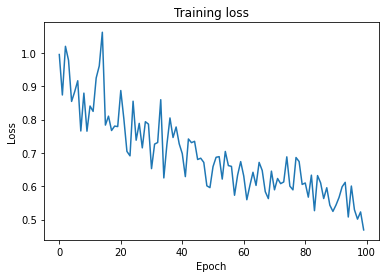

In [22]:
# From this plot, you can notice the continual downward trend as the model continues learning and getting trained by the dataset
# This signifies that the model gets accurate with more epochs
# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

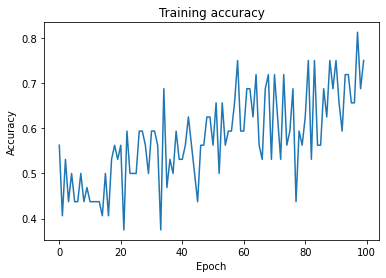

In [23]:
# Here, you can see the accuracy of the model rising continually which shows a model learning as it goes through more iterations
# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

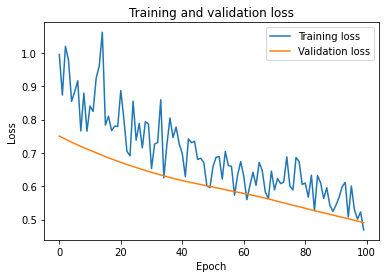

In [24]:
# From the training set, it can also be seen the downward trend as the bot gets more and more trained with the training set
# By the last epochs, the training loss is able to catch up with the validation loss.
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training loss','Validation loss'])
plt.show()

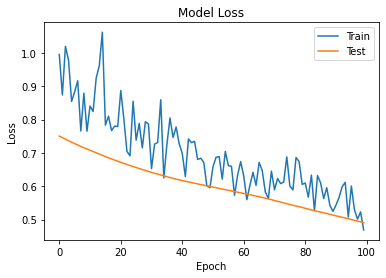

In [25]:
# Here, we compare the loss between the training and testing set
# In both sets, the downward trend is also comparable between one another which shows an accurate model seeing as the training set was able to catch up with the testing sets.
# Plotting the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()